In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spdlimits_df.csv")
df["mph"] = df.iloc[:,0]
df

,Unnamed: 0,Collisions,Injuries,Fatalities,Injuries per Crash,Fatalities per Crash,mph
0,65,3.293,1.372,0.023,0.416641,0.006985,65
1,70,1.395,0.404,0.006,0.289606,0.004301,70
2,55,19.020,9.177,0.057,0.482492,0.002997,55
3,15,0.830,0.271,0.002,0.326506,0.002410,15
4,45,8.213,4.741,0.017,0.577256,0.002070,45
5,40,8.897,5.522,0.017,0.620659,0.001911,40
6,30,38.945,18.870,0.064,0.484529,0.001643,30
7,35,54.063,27.621,0.079,0.510904,0.001461,35
8,25,86.334,34.042,0.075,0.394306,0.000869,25
9,20,0.632,0.252,0.000,0.398734,0.000000,20


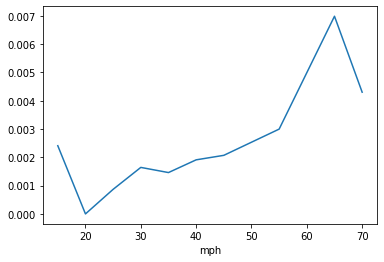

In [3]:
df.set_index("mph")["Fatalities per Crash"].sort_index().plot.line()

In [9]:
ycol = "Fatalities per Crash"
p = Pipeline([('poly', PolynomialFeatures(2, include_bias=False)), ('lr', LinearRegression())])
p.fit(df[["mph"]], df[ycol], df["Collisions"])
plt.plot(np.arange(100), p.predict(np.arange(100).reshape(-1,1)))

TypeError: fit() takes from 2 to 3 positional arguments but 4 were given

In [5]:
print(p.predict([[35]])) # how many expected deaths per crash at 35mph?
print(p.predict([[30]])) # how many expected at 30mph?
print(p.predict([[35]]) - p.predict([[30]])) # how many lives saved per crash by reducing speed?
print((p.predict([[35]]) - p.predict([[30]])) / p.predict([[35]]) * 100) # what percent do we expect to decrease deaths, crashes staying fixed?

[0.00150315]
[0.00130356]
[0.00019958]
[13.27777889]


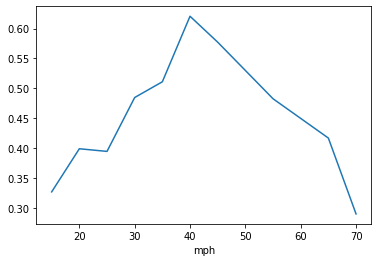

In [6]:
df.set_index("mph")["Injuries per Crash"].sort_index().plot.line()

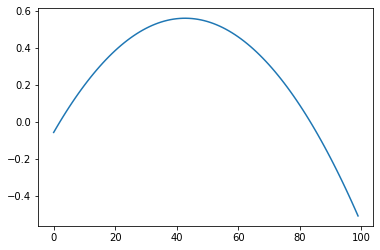

In [7]:
ycol = "Injuries per Crash"
p = Pipeline([('poly', PolynomialFeatures(2, include_bias=False)), ('lr', LinearRegression())])
p.fit(df[["mph"]], df[ycol])
plt.plot(np.arange(100), p.predict(np.arange(100).reshape(-1,1)))

In [8]:
print(p.predict([[35]])) # how many expected injuries per crash at 35mph?
print(p.predict([[30]])) # how many expected at 30mph?
print(p.predict([[35]]) - p.predict([[30]])) # how many injuries prevented per crash by reducing speed?
print((p.predict([[35]]) - p.predict([[30]])) / p.predict([[35]]) * 100) # what percent do we expect to decrease injuries, crashes staying fixed?

[0.5386745]
[0.50410471]
[0.03456979]
[6.41756488]
